In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
import statannotations
from statannotations import add_stat_annotation

sns.set(style="whitegrid")

### Boxplot non-hue

#### Multiple comparisons correction by default

By default, multiple comparisons correction (Bonferroni method) is applied.

In [2]:
df = sns.load_dataset("tips")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02


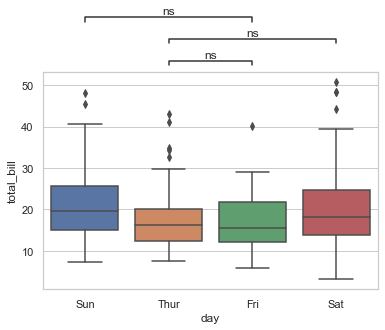

In [3]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
ax, test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

#### Statistical test results

The `add_stat_annotation` function returns the tuple `ax, test_results`, where `test_results` is a list of `StatResult` objects, containing both the original data of the boxes and the statistical test results (p-value, etc).

In [4]:
for res in test_results:
    print(res)

print("\nStatResult attributes:", test_results[0].__dict__.keys())

Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02

StatResult attributes: dict_keys(['test_description', 'test_short_name', 'stat_str', 'stat_value', 'pval', '_corrected_significance', '_correction_method', 'alpha', 'box1', 'box2'])


#### No multiple comparisons correction

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


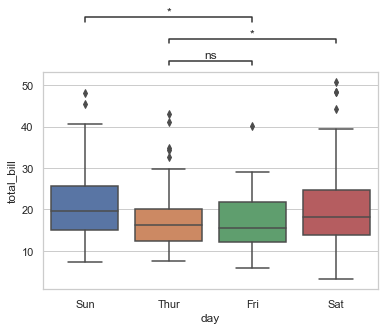

In [5]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=2)

#### Location

Statistical test annotation can be either drawn inside the plot area (`loc='inside'`), or on top on it (`loc='outside'`).

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sun v.s. Thur: Custom statistical test with bonferroni correction, P_val:1.000e-01
Sun v.s. Fri: Custom statistical test with bonferroni correction, P_val:1.000e-03
Sun v.s. Sat: Custom statistical test with bonferroni correction, P_val:1.000e-01


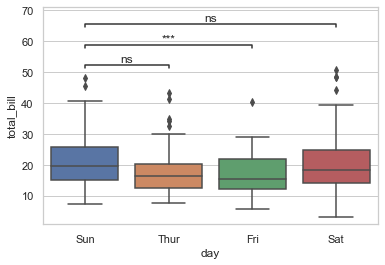

In [6]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")],
                    perform_stat_test=False, pvalues=[0.1, 0.1, 0.001],
                    test=None, text_format='star', loc='inside', verbose=2);
plt.savefig('example_non-hue_inside.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

We create boxes with unequal ymax position.

In [7]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

E_Ideal v.s. E_Premium: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.404e-30 U_stat=3.756e+06


../statannotations/statannotations.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = b_plotter.plot_hues[index] == hue_level


I_Ideal v.s. I_Premium: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:4.627e-60 U_stat=1.009e+06
J_Ideal v.s. J_Premium: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:3.616e-36 U_stat=2.337e+05
E_Ideal v.s. E_Very Good: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.562e-01 U_stat=4.850e+06
E_Ideal v.s. E_Good: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:4.681e-18 U_stat=1.480e+06
I_Ideal v.s. I_Good: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:4.507e-12 U_stat=4.359e+05
J_Ideal v.s. J_Good: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:9.056e-04 U_stat=1.174e+05
I_Premium v.s. J_Ideal: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:4.643e-26 U_stat=8.084e+05
E_Good v.s. I_Ideal: Mann-Whitney-Wilcoxon test two-sided with bonferroni correction, P_val:1.000e+00 U_stat=9.882e+05


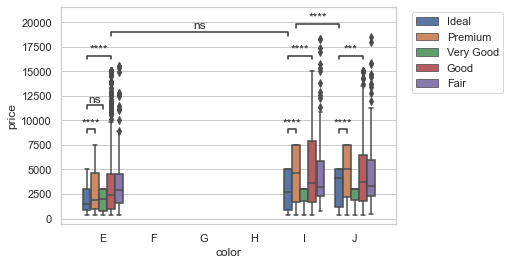

In [8]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue,)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [9]:
df = sns.load_dataset("tips")
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bucket
0,16.99,1.01,Female,No,Sun,Dinner,2,"(0.991, 4.0]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(0.991, 4.0]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(0.991, 4.0]"


In [10]:
# In this case we just have to pass the list of categories objects to the add_stat_annotation function.
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

[(0.991, 4.0], (4.0, 7.0], (7.0, 10.0]]
Categories (3, interval[float64]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Fri_(0.991, 4.0] v.s. Sat_(7.0, 10.0]: t-test independent samples with bonferroni correction, P_val:6.176e-07 stat_value=-7.490e+00


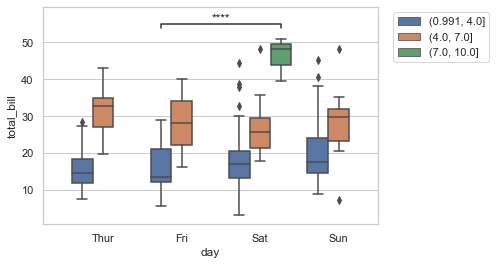

In [11]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
                    test='t-test_ind', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_bucketed.png', dpi=300, bbox_inches='tight')

### Barplot with hue

Note: Support for barplot has not been fully implemented yet.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI2_I v.s. SI2_J: t-test independent samples with bonferroni correction, P_val:1.000e+00 stat_value=-8.949e-01
SI1_I v.s. SI1_J: t-test independent samples with bonferroni correction, P_val:7.662e-04 stat_value=-3.937e+00
VS2_I v.s. VS2_J: t-test independent samples with bonferroni correction, P_val:6.125e-02 stat_value=-2.709e+00
I1_I v.s. I1_J: t-test independent samples with bonferroni correction, P_val:2.614e-01 stat_value=-2.206e+00
VS1_I v.s. VS1_J: t-test independent samples with bonferroni correction, P_val:8.226e-04 stat_value=-3.923e+00
VVS2_I v.s. VVS2_J: t-test independent samples with bonferroni correction, P_val:8.168e-13 stat_value=-7.672e+00
VVS1_I v.s. VVS1_J: t-test independent samples with bonferroni correction, P_val:5.882e-09 stat_value=-6.321e+00
IF_I v.s. IF_J: t-test independent samples with bonferron

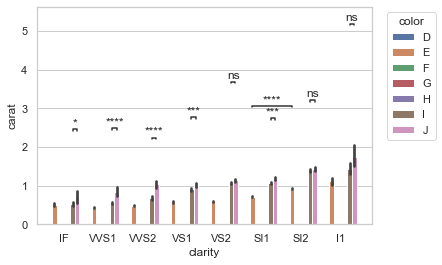

In [12]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]

x = "clarity"
y = "carat"
hue = "color"
# hue_order=['Ideal', 'Premium']
box_pairs = [
    (("SI2", "E"), ("SI1", "E"))
    ]
box_pairs = box_pairs + [((clar, 'I'), (clar, 'J')) for clar in df['clarity'].unique()]
width = 0.4
ax = sns.barplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, plot='barplot', data=df, x=x, y=y, hue=hue,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)
plt.savefig('example_barplot_hue.png', dpi=300, bbox_inches='tight')

### Tuning y offsets

![](example_tuning_y_offsets_w_arguments.png)

Sat_Yes v.s. Sat_No: t-test independent samples, P_val:4.304e-01 stat_value=7.922e-01
Thur_No v.s. Fri_No: t-test independent samples, P_val:7.425e-01 stat_value=-3.305e-01
Thur_Yes v.s. Sun_No: t-test independent samples, P_val:5.623e-01 stat_value=-5.822e-01


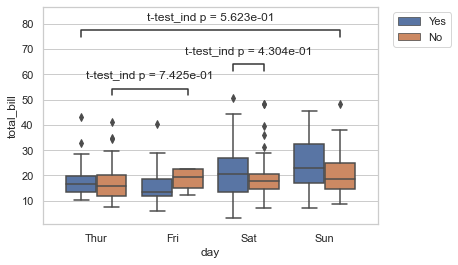

In [13]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Thur", "No"), ("Fri", "No")),
                                 (("Sat", "Yes"), ("Sat", "No")),
                                 (("Sun", "No"), ("Thur", "Yes"))
                                ],
                    test='t-test_ind', text_format='full', loc='inside', comparisons_correction=None,
                    line_offset_to_box=0.2, line_offset=0.1, line_height=0.05, text_offset=8,
                    verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

### Custom p-values as input

In [14]:
df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

box_pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in box_pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [0.008659557933879902, 6.378941946712463e-05, 0.14778816016231236]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: Custom statistical test with bonferroni correction, P_val:8.660e-03
versicolor v.s. virginica: Custom statistical test with bonferroni correction, P_val:1.478e-01
setosa v.s. virginica: Custom statistical test with bonferroni correction, P_val:6.379e-05


(<AxesSubplot:xlabel='species', ylabel='sepal_length'>,
  <statannotations.stats.StatResult.StatResult at 0x7f7550329eb0>])

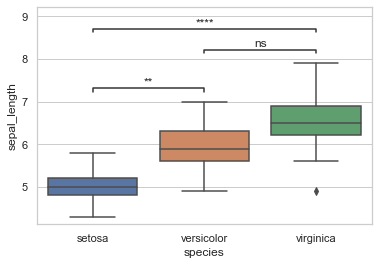

In [15]:
ax = sns.boxplot(data=df, x=x, y=y)
test_results = add_stat_annotation(ax, data=df, x=x, y=y,
                                   box_pairs=box_pairs,
                                   perform_stat_test=False, pvalues=pvalues, test_short_name=test_short_name,
                                   text_format='star', verbose=2)
test_results

### Custom annotation texts

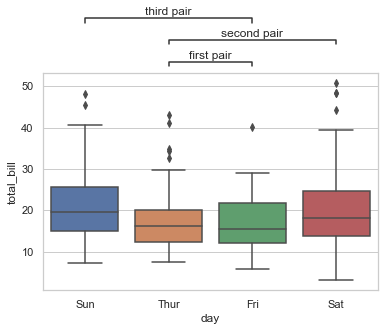

In [16]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   text_annot_custom=["first pair", "second pair", "third pair"],
                                   perform_stat_test=False, pvalues=[0, 0, 0],
                                   loc='outside', verbose=0)
plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')

In [17]:
# Dataset to showcase log charts and other changes
samples = pd.read_csv('samples.tsv',sep='\t')

/home/jlalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


H1N1 v.s. Influenza B: Mann-Whitney-Wilcoxon test two-sided, P_val:5.430e-02 U_stat=1.921e+03
H3N2 v.s. H1N1: Mann-Whitney-Wilcoxon test two-sided, P_val:4.141e-02 U_stat=8.479e+03
H3N2 v.s. Influenza B: Mann-Whitney-Wilcoxon test two-sided, P_val:2.982e-01 U_stat=3.838e+03


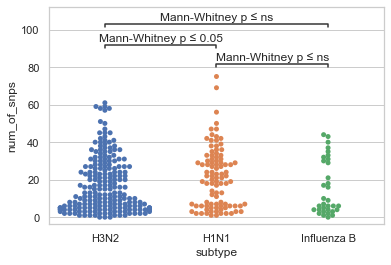

In [18]:
# Basic swarmplot with current stat_annotation code
fig, ax = plt.subplots(1,1)

subtypeOrder = ['H3N2', 'H1N1', 'Influenza B']
significanceComparisons = [('Influenza B','H3N2'),('Influenza B','H1N1'), ('H3N2','H1N1')]

fig_args = {'x': 'subtype',
           'y': 'num_of_snps',
           'data': samples,
           'order':['H3N2', 'H1N1', 'Influenza B'],
           'ax': ax}

stat_args = {'test':'Mann-Whitney',
             'comparisons_correction':None,
             'box_pairs':significanceComparisons,
             'text_format':'simple'}

ax = sns.swarmplot(**fig_args)
ax = add_stat_annotation(**fig_args, **stat_args)


fig.savefig(f'flu_dataset_num_of_snps_mann_whitney.svg', format='svg')

/home/jlalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


H1N1 v.s. Influenza B: Non-parametric bootstrapped two-sided comparison, P_val:4.380e-02 stat_value=1.000e+04
H3N2 v.s. H1N1: Non-parametric bootstrapped two-sided comparison, P_val:3.520e-02 stat_value=1.000e+04
H3N2 v.s. Influenza B: Non-parametric bootstrapped two-sided comparison, P_val:4.364e-01 stat_value=1.000e+04


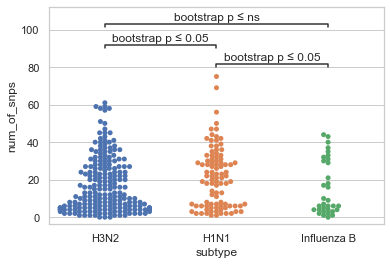

In [19]:
# Implement bootstrap
fig, ax = plt.subplots(1,1)

subtypeOrder = ['H3N2', 'H1N1', 'Influenza B']
significanceComparisons = [('Influenza B','H3N2'),('Influenza B','H1N1'), ('H3N2','H1N1')]

fig_args = {'x': 'subtype',
            'y': 'num_of_snps',
            'data': samples,
            'order':['H3N2', 'H1N1', 'Influenza B'],
            'ax': ax}

stat_args = {'test':'bootstrap',
             'comparisons_correction':None,
             'box_pairs':significanceComparisons,
             'text_format':'simple',
             'n_bootstraps':10000}

ax = sns.swarmplot(**fig_args)
ax = add_stat_annotation(**fig_args, **stat_args)


fig.savefig(f'flu_dataset_bootstrap.svg', format='svg')

<ipython-input-20-c60cc82004ca>:15: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  'data': samples.melt(id_vars=['sampleID', 'subtype'], value_vars=['nonsynon_mutation_rate_samp','synon_mutation_rate_samp'], var_name='Synon_Nonsynon', value_name='mutation_rate_samp').replace('nonsynon_mutation_rate_samp', 'Nonsynonymous').replace('synon_mutation_rate_samp', 'Synonymous'),
/home/jlalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jlalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

H1N1_Nonsynonymous v.s. H1N1_Synonymous: Non-parametric paired bootstrap two-sided comparison, P_val:0.000e+00 stat_value=1.000e+04
H3N2_Nonsynonymous v.s. H3N2_Synonymous: Non-parametric paired bootstrap two-sided comparison, P_val:0.000e+00 stat_value=1.000e+04
Influenza B_Nonsynonymous v.s. Influenza B_Synonymous: Non-parametric paired bootstrap two-sided comparison, P_val:5.288e-01 stat_value=1.000e+04


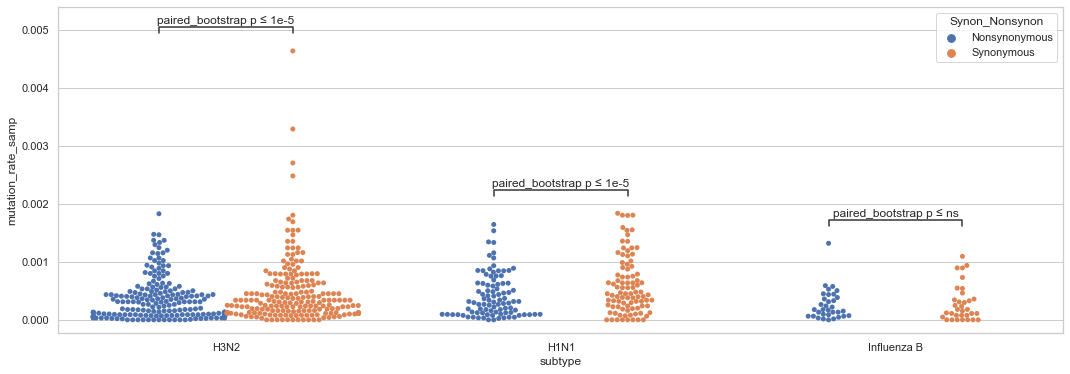

In [20]:
#test paired bootstrapping
import importlib
importlib.reload(statannotations)
from statannotations import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(18,6))

significanceComparisons = [(('H3N2','Synonymous'), ('H3N2','Nonsynonymous')),
                           (('H1N1','Synonymous'), ('H1N1','Nonsynonymous')),
                           (('Influenza B','Synonymous'), ('Influenza B','Nonsynonymous'))]

fig_args = {'x': 'subtype',
            'y': 'mutation_rate_samp',
            'hue':'Synon_Nonsynon',
            'data': samples.melt(id_vars=['sampleID', 'subtype'], value_vars=['nonsynon_mutation_rate_samp','synon_mutation_rate_samp'], var_name='Synon_Nonsynon', value_name='mutation_rate_samp').replace('nonsynon_mutation_rate_samp', 'Nonsynonymous').replace('synon_mutation_rate_samp', 'Synonymous'),
            'order': ['H3N2', 'H1N1', 'Influenza B'],
            'hue_order':['Nonsynonymous','Synonymous'],
            'dodge':True,
            'ax': ax}

stat_args = {'test':'paired_bootstrap',
             'comparisons_correction':None,
             'box_pairs':significanceComparisons,
             'text_format':'simple',
             'n_bootstraps':10000}

sns.swarmplot(**fig_args)

ax = add_stat_annotation(**fig_args, **stat_args)

fig.savefig(f'flu_dataset_paired_bootstrap.svg', format='svg')

In [24]:
samples.columns

Index(['sampleID', 'ptID', 'subtype', 'CT', 'mapped', 'sample_date',
       'decimalDate', 'seasonalDate', 'week', 'season', 'day0_or_day7_sample',
       'household', 'participant_ID', 'age', 'gender', 'time_of_symptom_onset',
       'recieved_flu_vaccine', 'school', 'jackson_score', 'antipyretic_use',
       'flu_antiviral_treatment', 'school_absence', 'number_in_household',
       'recent_travel', 'isIndexCase', '%ofHHinfected', 'age_category',
       'days_since_symptom_onset', 'symptom_severity', 'saw_a_doctor',
       'taken_on_hh_infection_day', 'clade', 'subclade', 'num_of_snps',
       'num_of_mixed_muts', 'num_of_nonsynon_muts', 'num_of_oof_muts',
       'num_of_synon_muts', 'Xue_divergence', 'Xue_mixed_divergence',
       'Xue_nonsynon_divergence', 'Xue_oof_divergence', 'Xue_synon_divergence',
       'pi_sample', 'num_N_sites_samp', 'num_S_sites_samp', 'piN_sample',
       'piS_sample', 'snps_per_day_samp', 'synon_snps_per_day_samp',
       'nonsynon_snps_per_day_samp', 'oof

In [ ]:
samples['sampleID', 'subtype', 'num_of_snps', 'mutation_rate_samp', 'synon_mutation_rate_samp', 'nonsynon_mutation_rate_samp'].to_csv('')